<a href="https://colab.research.google.com/github/TitanLeonov/Leonov_Alexander_PI3-1b_computer_math_/blob/main/%5C%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0_Pandas_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №5. Библиотека Pandas. Визуальный анализ данных

## Комплексное задание №1. Применение основных методов для анализа данных

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/drive/1SLqmaYz4xEsxVV-LGwb3ityheBTzHJQu?usp=sharing)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с Вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
%matplotlib inline
import pandas as pd
pd.__version__

'1.5.3'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [ ]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [ ]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [ ]:
rows = df.shape
column = df.shape
print(f'Строк - {rows}')
print(f'КОлонок - {column}')

3) Какие типы данных у элементов этого датасета?

In [ ]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


4) Какие признаки имеют пропуски?

In [ ]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print("Столбцы с пропусками:", columns_with_missing_values)


Столбцы с пропусками: ['workclass', 'occupation', 'native.country']


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: Пропуски в данных, связанные с рабочим классом (workclass), родом занятий (occupation) и родной страной (native.country), могут быть обусловлены особенностями определенных профессиональных областей или групп населения. Например, работники государственных структур или военнослужащие часто подпадают под регуляции по секретности информации и не могут раскрывать определенные данные о своем трудовом статусе, профессии или даже стране происхождения.

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [ ]:
unique_el = df['workclass'].dropna().unique()
print("Уникальные рабочие классы и их количество:")
print(unique_el)
print(f"Всего {len(unique_el)}")

Уникальные рабочие классы и их количество:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
Всего 8


7) Какой средний возраст женщин и мужчин?

In [ ]:
mean_age_by_sex = df.groupby('sex')['age'].mean()
print("Средний возраст женщин и мужчин:")
print(mean_age_by_sex)

Средний возраст женщин и мужчин:
sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64


8) Постройте гистограмму(bar) распределения образования людей (education)

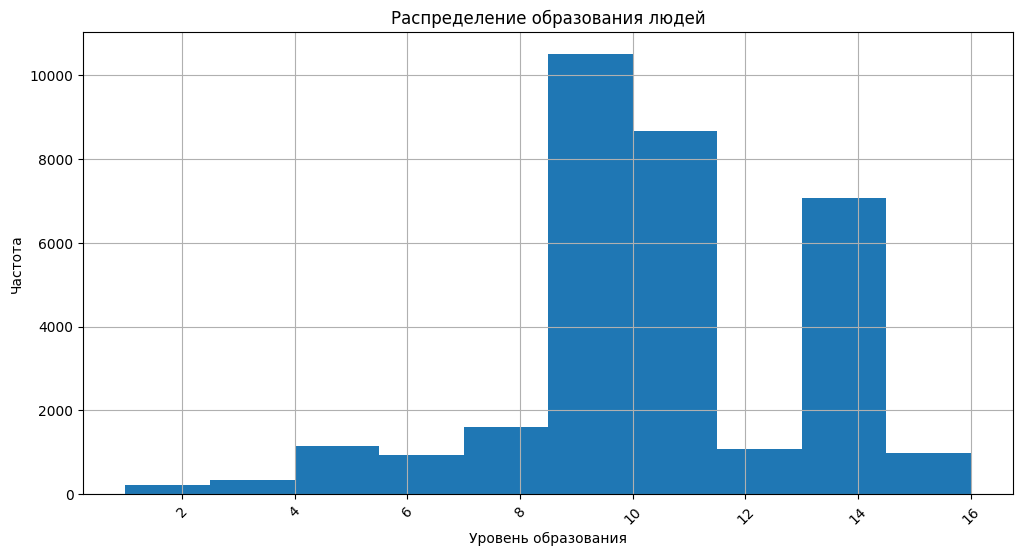

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df['education.num'].hist()
plt.title('Распределение образования людей')
plt.xlabel('Уровень образования')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак income) и тех, кто получает менее 50K в год?

In [ ]:
statistics_by_income = df.groupby('income')['age'].agg(['mean', 'std'])


print("Статистика по возрасту для каждой группы дохода:")
print(statistics_by_income)

Статистика по возрасту для каждой группы дохода:
             mean        std
income                      
 <=50K  36.783738  14.020088
 >50K   44.249841  10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [ ]:
more_50 = df.loc[df['income'] == ' >50K']
all_rows, _ = more_50.shape

filter = [' Bachelors', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', ' Masters', ' Doctorate']
educ_people = more_50[more_50['education'].isin(filter)]
educ_rows, _ = educ_people.shape

print('Всего людей получающих более 50К в год:', all_rows)
print('Людей имеющих высшее образование: ', educ_rows)
print(f'Соответсвенно людей не имеющих высшего образования, получающих более 50К в год: {all_rows-educ_rows}')
print('Вывод - неправда')

Всего людей получающих более 50К в год: 7841
Людей имеющих высшее образование:  4535
Соответсвенно людей не имеющих высшего образования, получающих более 50К в год: 3306
Вывод - неправда


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [ ]:
married_filter = [' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse']
maried_people = more_50[more_50['marital.status'].isin(married_filter)]
idle_people = more_50[more_50['marital.status'].isin(married_filter)]

married_rows, _ = maried_people.shape
idle_rows, _ = idle_people.shape
print('Женатые(более 50к):', married_rows)
print('Холостые(более 50к):', idle_rows)
print('Женатых больше')


Женатые(более 50к): 6736
Холостые(более 50к): 6736
Женатых больше


12) Постройте [сводную таблицу](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) для отображения зависимостей среднего времени работы (hours.per.week) с доходом (income) для каждой страны (native.country).  


> Пример фрагмента таблицы:



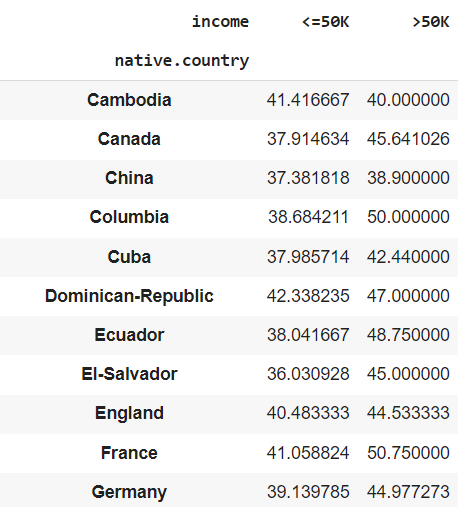

In [ ]:
pivot_table = df.pivot_table(index='native.country', columns='income', values='hours.per.week', aggfunc='mean')

print(pivot_table)

income                           <=50K       >50K
native.country                                   
 Cambodia                    41.416667  40.000000
 Canada                      37.914634  45.641026
 China                       37.381818  38.900000
 Columbia                    38.684211  50.000000
 Cuba                        37.985714  42.440000
 Dominican-Republic          42.338235  47.000000
 Ecuador                     38.041667  48.750000
 El-Salvador                 36.030928  45.000000
 England                     40.483333  44.533333
 France                      41.058824  50.750000
 Germany                     39.139785  44.977273
 Greece                      41.809524  50.625000
 Guatemala                   39.360656  36.666667
 Haiti                       36.325000  42.750000
 Holand-Netherlands          40.000000        NaN
 Honduras                    34.333333  60.000000
 Hong                        39.142857  45.000000
 Hungary                     31.300000  50.000000


13) Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму:&nbsp;  
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю  
&nbsp; Подсказка:
```
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
```
4. Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.  
  * В нашем случае, можно воспользоваться методом [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) и равномерно разделить наш набор данных на целевое количество категорий
5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()  
&nbsp; Пример:
```
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

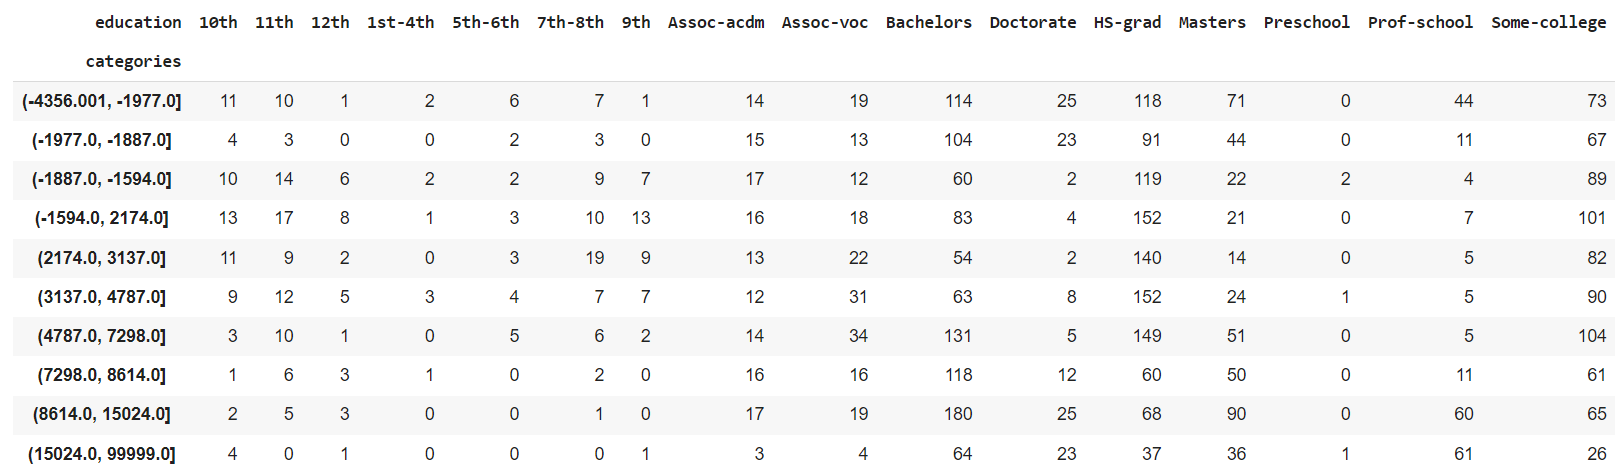

In [ ]:
summary_table = pd.DataFrame()
summary_table['education'] = df['education']
summary_table['capital.diff'] = df['capital.gain'] - df['capital.loss']
summary_table = summary_table[summary_table['capital.diff'] != 0]
summary_table['categories'] = pd.qcut(summary_table['capital.diff'], q=10)

summary_table.pivot_table(index='categories', columns='education', aggfunc='size', fill_value=0)


education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
categories,,,,,,,,,,,,,,,,
"(-4356.001, -1977.0]",11,10,1,2,6,7,1,14,19,114,25,118,71,0,44,73
"(-1977.0, -1887.0]",4,3,0,0,2,3,0,15,13,104,23,91,44,0,11,67
"(-1887.0, -1594.0]",10,14,6,2,2,9,7,17,12,60,2,119,22,2,4,89
"(-1594.0, 2174.0]",13,17,8,1,3,10,13,16,18,83,4,152,21,0,7,101
"(2174.0, 3137.0]",11,9,2,0,3,19,9,13,22,54,2,140,14,0,5,82
"(3137.0, 4787.0]",9,12,5,3,4,7,7,12,31,63,8,152,24,1,5,90
"(4787.0, 7298.0]",3,10,1,0,5,6,2,14,34,131,5,149,51,0,5,104
"(7298.0, 8614.0]",1,6,3,1,0,2,0,16,16,118,12,60,50,0,11,61
"(8614.0, 15024.0]",2,5,3,0,0,1,0,17,19,180,25,68,90,0,60,65


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [ ]:
pivot_table = pd.pivot_table(female_high_income, index='native.country', values='income', aggfunc='count')
pivot_table = pivot_table.sort_values(by='income', ascending=False)


print(pivot_table)

                     income
native.country             
 United-States         1072
 Philippines             12
 Canada                   9
 Germany                  7
 England                  6
 Japan                    5
 China                    5
 Italy                    5
 Taiwan                   4
 Cuba                     3
 France                   3
 South                    3
 Mexico                   2
 Dominican-Republic       2
 India                    2
 Iran                     2
 Puerto-Rico              2
 Portugal                 2
 Poland                   2
 Vietnam                  1
 Thailand                 1
 Scotland                 1
 Greece                   1
 Nicaragua                1
 Haiti                    1
 Laos                     1
 El-Salvador              1
 Jamaica                  1
 Ireland                  1
 Hungary                  1
 Hong                     1
 Honduras                 1
 Yugoslavia               1


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [ ]:
ч
ч
ч
ч
ч
ч
ч
ч
ч
ч
ч
ч
ч

education
 10th             26.698821
 11th             24.221277
 12th             28.270208
 1st-4th          21.750000
 5th-6th          23.735736
 7th-8th          25.969040
 9th              24.457198
 Assoc-acdm       55.985942
 Assoc-voc        58.055716
 Bachelors        82.775163
 Doctorate       135.288136
 HS-grad          41.680888
 Masters         105.610563
 Preschool        16.000000
 Prof-school     134.234375
 Some-college     46.627760
Name: magic_salary, dtype: float64


## Комплексное задание №2. Визуальный анализ данных. Часть 1

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании Вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите самостоятельно(!), с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bikes_rent.csv')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.3 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

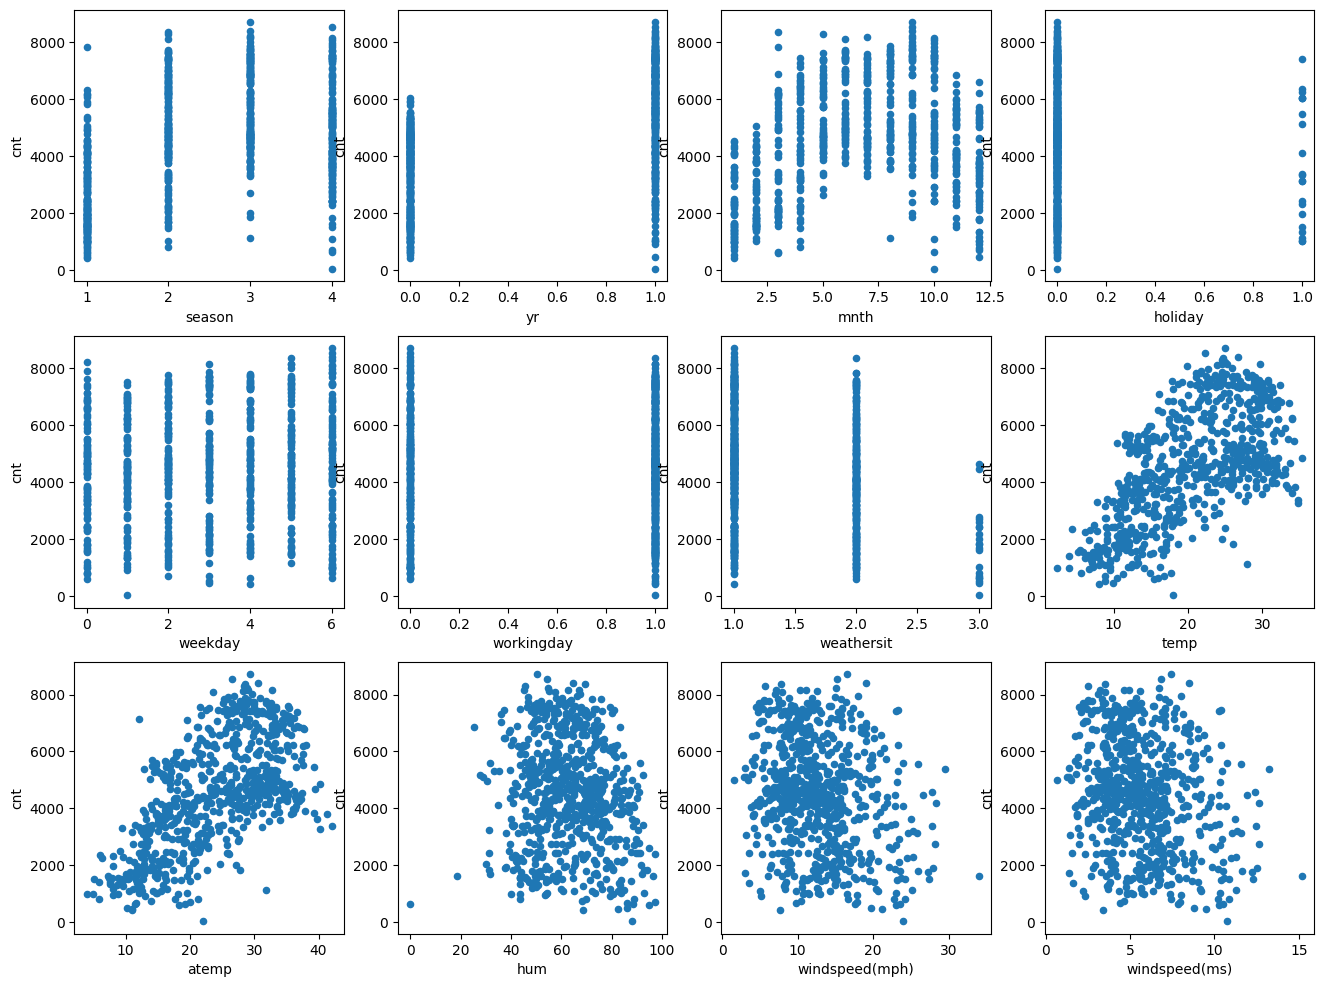

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

### 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?





ответ: В разгар теплых месяцев, когда зима уступает место весне и лету, спрос на прокат велосипедов значительно возрастает. Например, в январе число прокатов в день достигает примерно 4300, в то время как в августе этот показатель увеличивается до примерно 8000 прокатов в день. Постепенно, с приходом осени и наступлением зимы, спрос начинает снижаться: пик прокатов в сентябре составляет около 9000, а в декабре - примерно 6800.

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.



Ответ:  Кличество прокатов линейно зависит от температуры в Цельсиях (temp) и ощущаемой температуры в Цельсиях (atemp). Чем выше температура, тем больше людей прокатывается на велосипедах.




### 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.



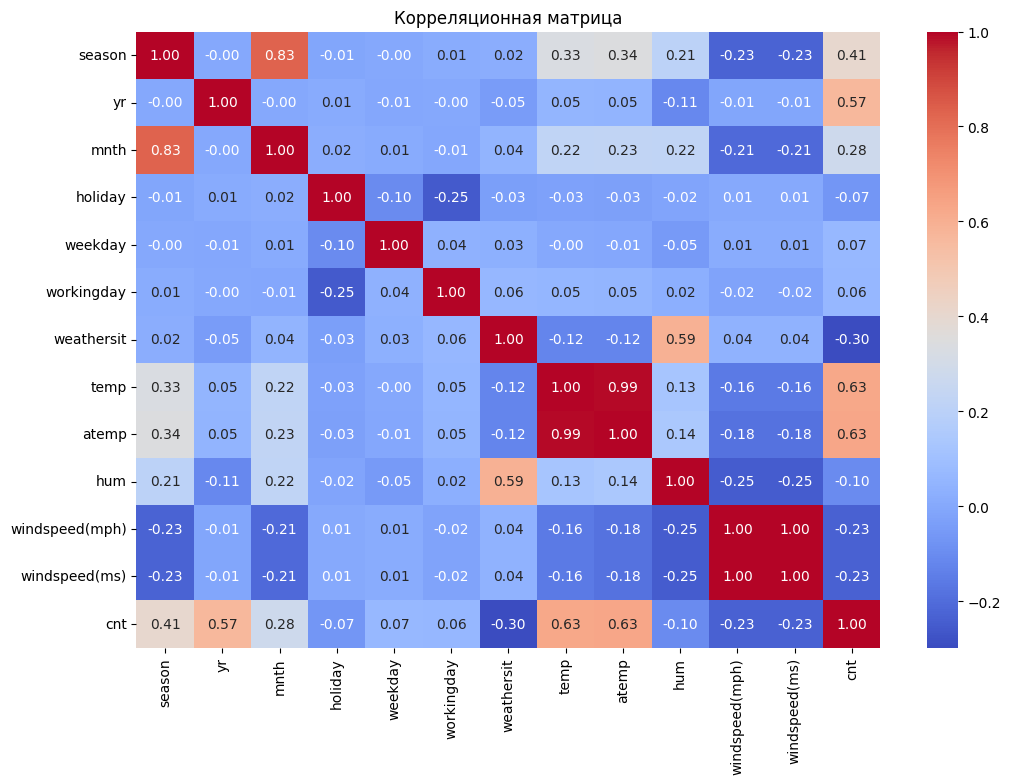

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ Количество прокатов коррелирует меньше всего (около 4 штук) с признаками: hum, windspeed.mph, windspeed.ms, instant.

Количество прокатов коррелирует больше всего с признаками: atemp, temp, casual, registered, yr.

### 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)



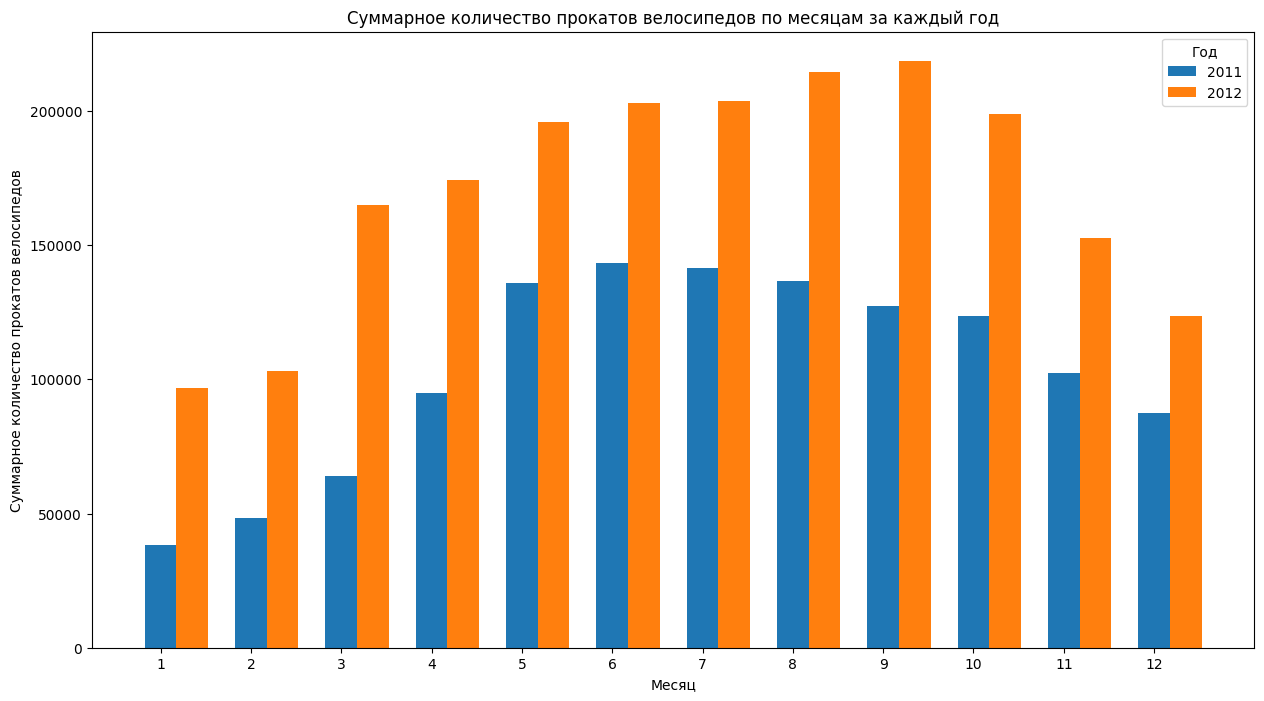

In [ ]:
df_grouped = df.groupby(['yr', 'mnth'])['cnt'].sum().unstack()

plt.figure(figsize=(15, 8))
bar_width = 0.35
months = range(1, 13)
bar_positions_2011 = months
bar_positions_2012 = [pos + bar_width for pos in bar_positions_2011]
plt.bar(bar_positions_2011, df_grouped.loc[0], width=bar_width, label='2011')
plt.bar(bar_positions_2012, df_grouped.loc[1], width=bar_width, label='2012')

plt.xlabel('Месяц')
plt.ylabel('Суммарное количество прокатов велосипедов')
plt.title('Суммарное количество прокатов велосипедов по месяцам за каждый год')
plt.xticks(bar_positions_2011, months)
plt.legend(title='Год')

plt.show()



**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ:  причиной высокой корреляции между количеством прокатов и годом на предыдущем графике может быть изменение спроса на прокат велосипедов с течением времени. Например, если велосипеды становятся все более популярным средством передвижения, спрос на прокат велосипедов может увеличиваться с каждым годом

### 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,



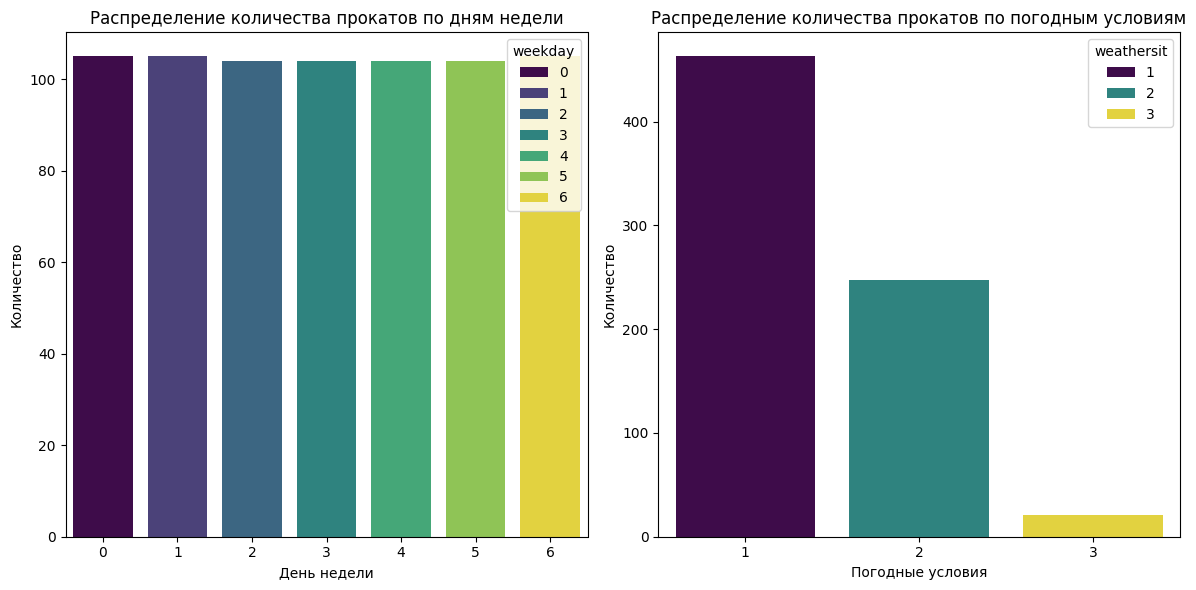

In [ ]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.countplot(x='weekday', hue='weekday', data=df, palette='viridis')
plt.xlabel('День недели')
plt.ylabel('Количество')
plt.title('Распределение количества прокатов по дням недели')

plt.subplot(1, 2, 2)
sns.countplot(x='weathersit', hue='weathersit', data=df, palette='viridis')
plt.xlabel('Погодные условия')
plt.ylabel('Количество')
plt.title('Распределение количества прокатов по погодным условиям')

plt.tight_layout()
plt.show()


**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.



Ответ:

Датасет собирал информацию в течение двух лет, предположительно, чтобы изучить аренду велосипедов в разные дни недели и при различных погодных условиях. Этот период времени, если данные действительны, позволяет предположить, что распределение аренды велосипедов по дням недели достаточно равномерно, без явных пиков или спадов. Возможно, это указывает на то, что спрос на аренду велосипедов остается стабильным вне зависимости от конкретного дня недели.

По данным о погоде можно сделать вывод, что аренда велосипедов наиболее популярна в дни с хорошей погодой (1 и 2), и практически не осуществляется в очень плохую погоду. Это говорит о значительном влиянии погодных условий на количество арендованных велосипедов.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?


    
Ответ: Распределение значений признака weekday называется равномерным. Это можно сказать, предполагая, что weekday отражает день недели и в датасете присутствуют данные о прокатах велосипедов в течение всей недели без каких-либо аномалий в распределении по дням.

### 5. Распределение

Постройте распределение целевого признака.


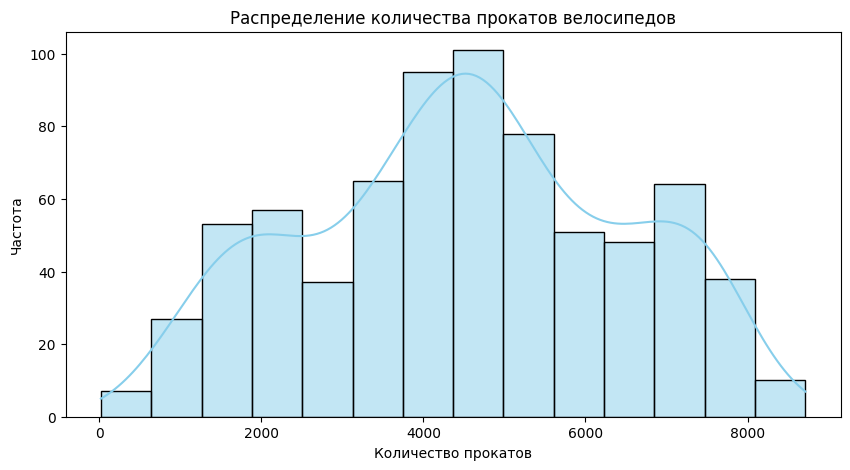

Среднее количество прокатов в день: 4504.35


In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['cnt'], kde=True, color='skyblue')
plt.xlabel('Количество прокатов')
plt.ylabel('Частота')
plt.title('Распределение количества прокатов велосипедов')
plt.show()



**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

Ответ: Среднее колличество прокатов в день примерно составляет 4500

### 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.



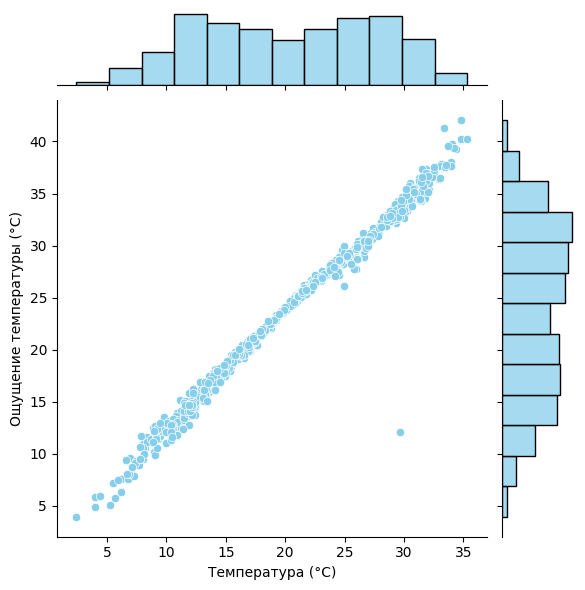

In [ ]:
sns.jointplot(x='temp', y='atemp', data=df, kind='scatter', color='skyblue')
plt.xlabel('Температура (°C)')
plt.ylabel('Ощущение температуры (°C)')
plt.show()

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ:
График показывает сильную взаимосвязь между температурой и ощущаемой температурой, что выражается почти прямой линией. Ощущаемая температура рассчитывается на основе реальной температуры с учетом влажности и скорости ветра. Вероятно, данные об ощущаемой температуре получены путем применения функции к реальной температуре, что может быть более точным, чем опрос людей.

### 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.




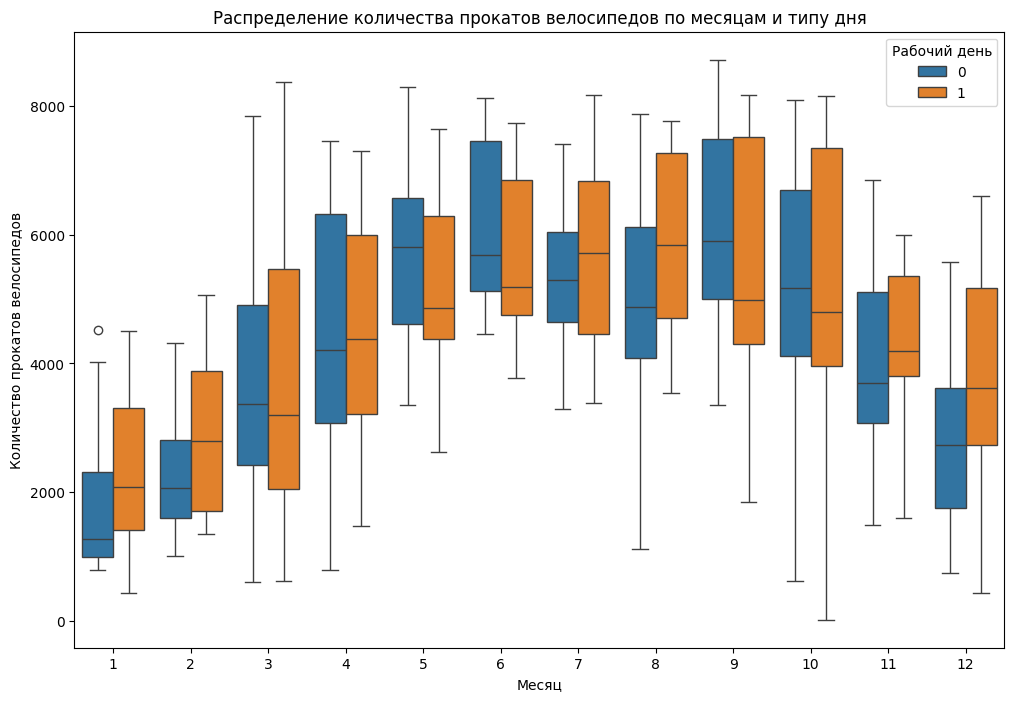

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='mnth', y='cnt', hue='workingday', data=df)
plt.xlabel('Месяц')
plt.ylabel('Количество прокатов велосипедов')
plt.title('Распределение количества прокатов велосипедов по месяцам и типу дня')
plt.legend(title='Рабочий день', loc='upper right')
plt.show()


**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.

Ответ:
Возможно, это связано с сезонностью и характером работы людей в разных месяцах. Например, в теплые месяцы (лето, начало осени) люди могут чаще брать велосипеды в выходные дни для активного отдыха и прогулок, в то время как в более холодные месяцы (зима, начало весны) предпочитают использовать велосипеды для поездок на работу или другие дела в будние дни, когда нужно быть более мобильным. Также влияние может оказывать погода, мероприятия и праздники, которые могут повлиять на количество прокатов велосипедов в разные дни недели.

## Комплексное задание №3. Визуальный анализ данных. Часть 2

In [ ]:
!pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
colab = True # если работаете на своём компьютере, в локальной среде, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


В этом задании Вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

Исходные данные загрузите самостоятельно!

In [ ]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("../../data/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Ход задания:

#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


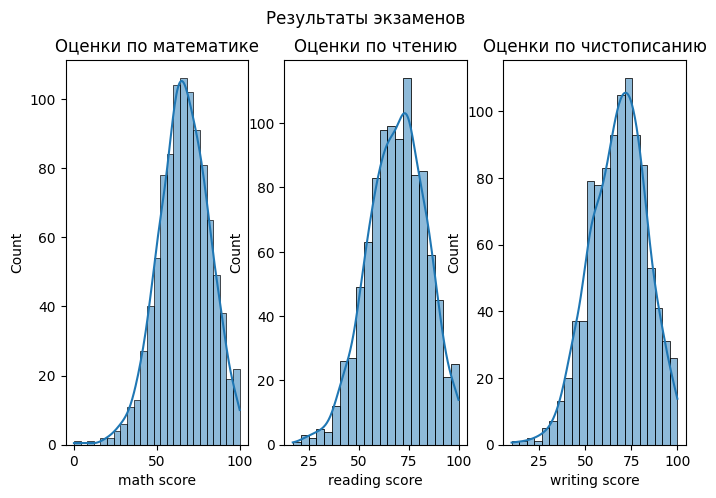

Медианные значения: Математика 66.0; Чтение 70.0; Чистописание 69.0


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(8, 5))
fig.suptitle('Результаты экзаменов')

sns.histplot(df['math score'], kde=True, ax=axes[0])
axes[0].set_title('Оценки по математике')

sns.histplot(df['reading score'], kde=True, ax=axes[1])
axes[1].set_title('Оценки по чтению')

sns.histplot(df['writing score'], kde=True, ax=axes[2])
axes[2].set_title('Оценки по чистописанию')

plt.show()

print(f'Медианные значения: Математика {df["math score"].median()}; Чтение {df["reading score"].median()}; Чистописание {df["writing score"].median()}')


#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


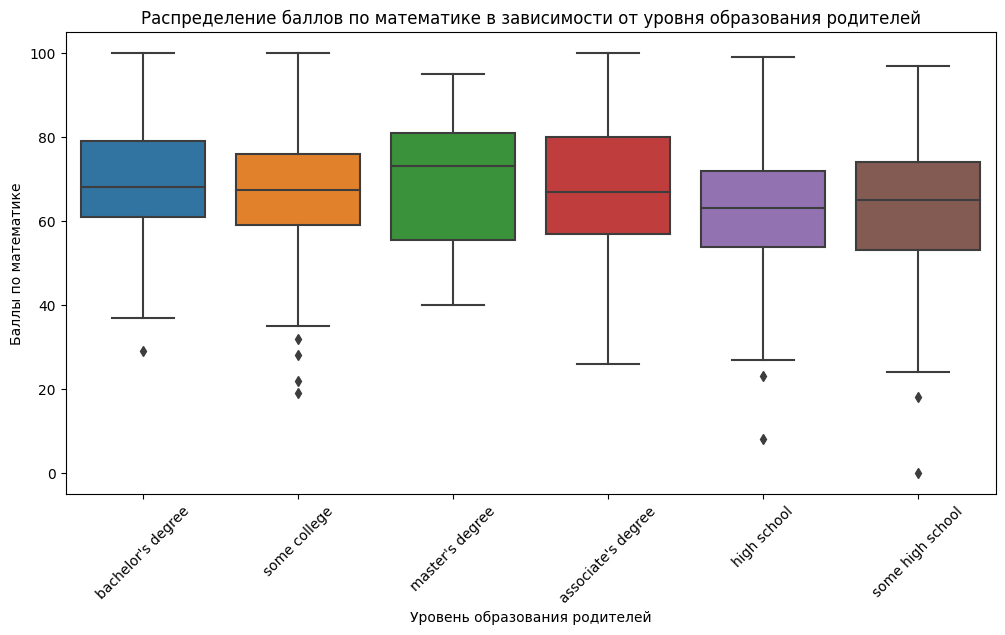

Уровни образования и количество строк для каждого уровня:
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='parental level of education', y='math score', data=df, order=education_levels)
plt.xticks(rotation=45)
plt.xlabel('Уровень образования родителей')
plt.ylabel('Баллы по математике')
plt.title('Распределение баллов по математике в зависимости от уровня образования родителей')
plt.show()
education_levels = df['parental level of education'].unique()
count_per_education = df['parental level of education'].value_counts()

print("Уровни образования и количество строк для каждого уровня:")
print(count_per_education)

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [ ]:
count_female_over_90 = len(df[(df['gender'] == 'female') & (df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90)])

print("Число студенток, набравших больше 90 баллов по всем предметам:", count_female_over_90)


Число студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [ ]:
subject = ['math score', 'reading score', 'writing score']
val = ['min', 'max', 'median']

df.groupby('gender')[subject].agg(val)

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете  [pd.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html))

In [ ]:
filter = ['gender', 'lunch', 'test preparation course']

df.groupby(filter)[subject].agg('mean')

math score  reading score  \
gender lunch        test preparation course                              
female free/reduced completed                 60.785714      73.428571   
                    none                      52.890756      63.831933   
       standard     completed                 71.131579      79.798246   
                    none                      66.530233      73.386047   
male   free/reduced completed                 65.639344      65.786885   
                    none                      60.609524      59.076190   
       standard     completed                 75.955752      72.601770   
                    none                      69.832512      64.719212   

                                             writing score  
gender lunch        test preparation course                 
female free/reduced completed                    74.371429  
                    none                         61.781513  
       standard     completed                    81.508772  
                    none                         72.967442  
male   free/reduced completed                    65.737705  
                    none                         55.285714  
       standard     completed                    71.982301  
                    none                         61.906404

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

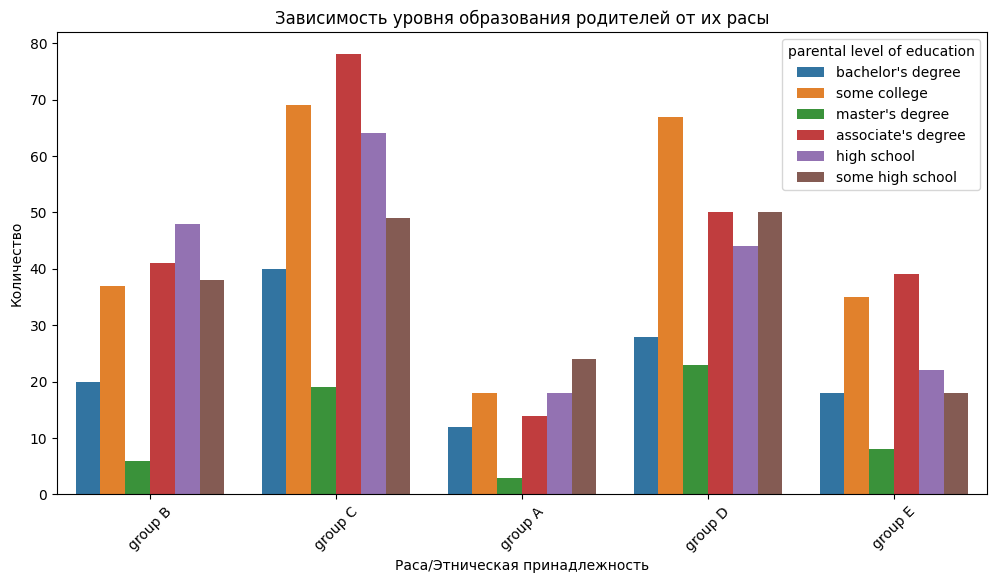

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='race/ethnicity', hue='parental level of education', data=df)

plt.title('Зависимость уровня образования родителей от их расы')
plt.xlabel('Раса/Этническая принадлежность')
plt.ylabel('Количество')

plt.xticks(rotation=45)

plt.show()


#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

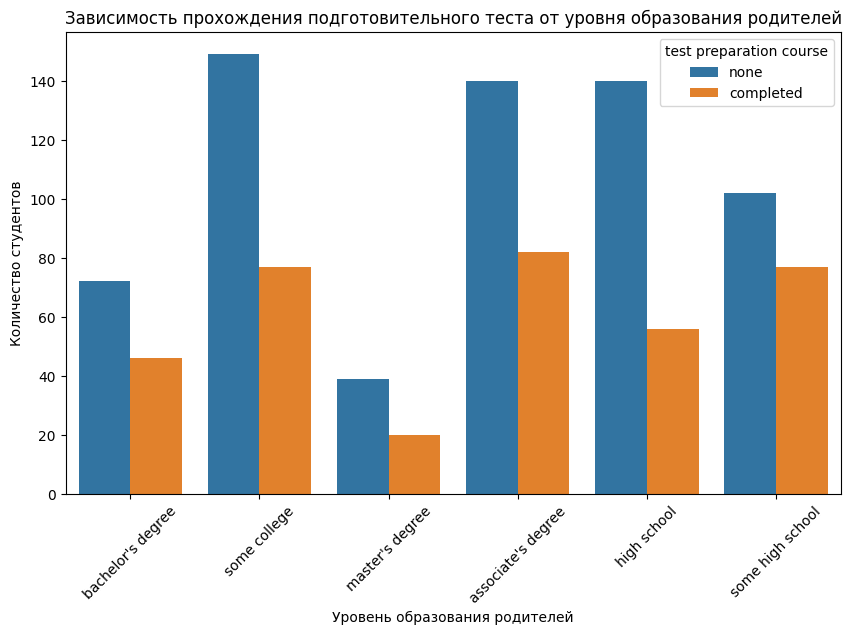

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(x='parental level of education', hue='test preparation course', data=df)

plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество студентов')

plt.xticks(rotation=45)

plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

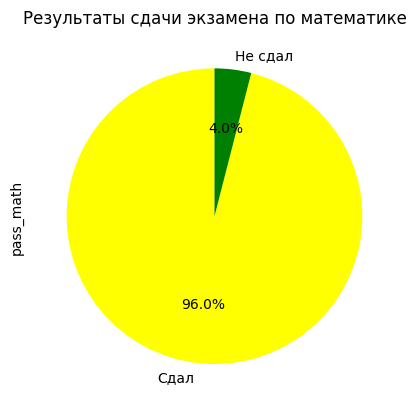

In [ ]:
df['pass_math'] = df['math score'].apply(lambda x: 'Сдал' if x >= 40 else 'Не сдал')

pass_math_counts = df['pass_math'].value_counts()
pass_math_counts.plot.pie(autopct='%1.1f%%', labels=['Сдал', 'Не сдал'], colors=['yellow', 'green'], startangle=90)
plt.title('Результаты сдачи экзамена по математике')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

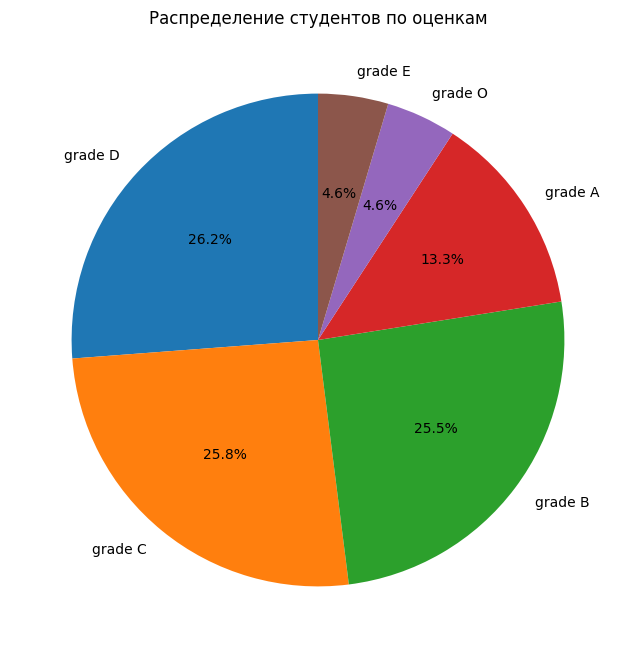

In [ ]:
def assign_grade(row):
    average_score = (row['math score'] + row['reading score'] + row['writing score']) / 3
    if row['math score'] < 40:
        return 'grade E'
    if average_score < 40:
        return 'grade E'
    elif 40 <= average_score < 61:
        return 'grade D'
    elif 61 <= average_score < 71:
        return 'grade C'
    elif 71 <= average_score < 81:
        return 'grade B'
    elif 81 <= average_score < 91:
        return 'grade A'
    else:
        return 'grade O'

df['summary grade'] = df.apply(assign_grade, axis=1)
summary_grade_counts = df['summary grade'].value_counts()

plt.figure(figsize=(8, 8))
summary_grade_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=summary_grade_counts.index)
plt.title('Распределение студентов по оценкам')
plt.ylabel('')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

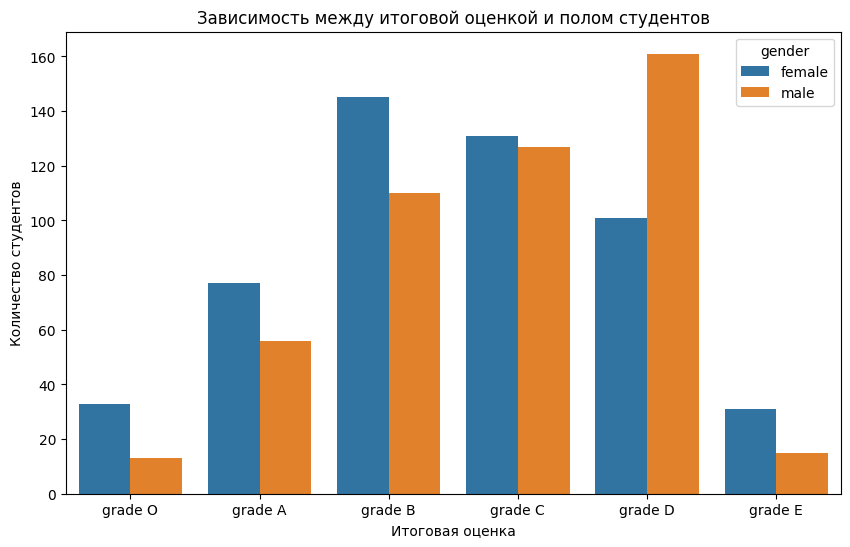

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='summary grade', hue='gender', data=df, order=['grade O', 'grade A', 'grade B', 'grade C', 'grade D', 'grade E'])
plt.title('Зависимость между итоговой оценкой и полом студентов')
plt.xlabel('Итоговая оценка')
plt.ylabel('Количество студентов')
plt.show()